# Introduction to Data Optimization - Feature Selection


# Feature Selection - Categorical Input

* How to evaluate the importance of categorical features using the chi-squared and mutual information statistics.
* How to perform feature selection for categorical data when fitting and evaluating a classification model.

In [4]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split

# load the dataset
def load_dataset(filename):
  # load the dataset
  data = read_csv(filename, header=None)

  # retrieve array
  dataset = data.values

  # split into input and output variables
  X = dataset[:,:-1]
  y = dataset[:,-1]

  # format all fields as string
  X = X.astype(str)
  return X, y

In [6]:
# load the dataset
X, y = load_dataset('breast-cancer.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (191, 9) (191,)
Test (95, 9) (95,)


## Chi-Squared Feature Selection

* Pearson's chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.
* The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.
* The scikit-learn machine library provides an implementation of the chi-squared test in the chi2() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

In [10]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# load the dataset
data = read_csv('breast-cancer.csv', header=None)

# split into input and output
dataset = data.values
X = dataset[:, :-1].astype(str)
y = dataset[:, -1]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target data
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# encode data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(
    X_train_enc, y_train_enc, X_test_enc
)




In this case, we can see the scores are small and it is hard to get an idea from the number alone as to which features are more relevant. Perhaps features 3, 4, 5, and 8 are most relevant.

In [11]:
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


A bar chart of the feature importance scores for each input feature is created. This clearly shows that feature 3 might be the most relevant (according to chi-squared) and that perhaps four of the nine input features are the most relevant. We could set k = 4 when configuring the SelectKBest to select these top four features.

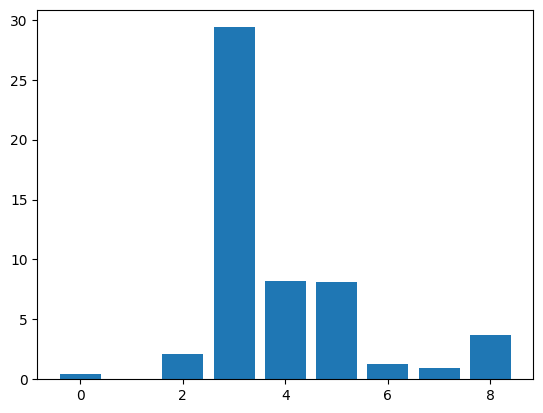

In [12]:
# plot feature scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Mutual Information Feature Selection

* Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.
* Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
* The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the mutual info classif() function. Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).

In [7]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from matplotlib import pyplot

# load the dataset
data = read_csv('breast-cancer.csv', header=None)

# split into input and output
dataset = data.values
X = dataset[:, :-1].astype(str)
y = dataset[:, -1]

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target data
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection using mutual information
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)

# encode data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(
    X_train_enc, y_train_enc, X_test_enc
)



In [8]:
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.043030
Feature 1: 0.000000
Feature 2: 0.137762
Feature 3: 0.004280
Feature 4: 0.026870
Feature 5: 0.052343
Feature 6: 0.000000
Feature 7: 0.010919
Feature 8: 0.017870


In this case, we can see that some of the features have a very low score, suggesting that perhaps they can be removed. Perhaps features 3, 6, 2, and 5 are most relevant.

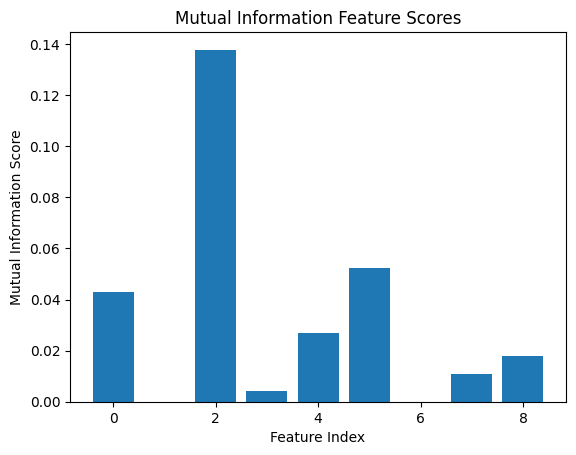

In [9]:
# plot feature importance
pyplot.bar(range(len(fs.scores_)), fs.scores_)
pyplot.xlabel('Feature Index')
pyplot.ylabel('Mutual Information Score')
pyplot.title('Mutual Information Feature Scores')
pyplot.show()


A bar chart of the feature importance scores for each input feature is created. Importantly, a different mixture of features is promoted.

# Feature Selection - Numerical Input

* How to evaluate the importance of numerical features using the ANOVA F-test and mutual information statistics.
* How to perform feature selection for numerical data when fitting and evaluating a classification model.



In [13]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split

# load the dataset
def load_dataset(filename):

  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)

  # retrieve numpy array
  dataset = data.values

  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

In [14]:
# load the dataset
X, y = load_dataset('indians-diabetes.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (514, 8) (514,)
Test (254, 8) (254,)


## ANOVA F-test Feature Selection

* The scikit-learn machine library provides an implementation of the ANOVA F-test in the f classif() function.
* This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.
* For example, we can define the SelectKBest class to use the f classif() function and select all features, then transform the train and test sets.


In [16]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):

  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)

  # retrieve numpy array
  dataset = data.values

  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):

  # configure to select all features
  fs = SelectKBest(score_func=f_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('indians-diabetes.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [17]:
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


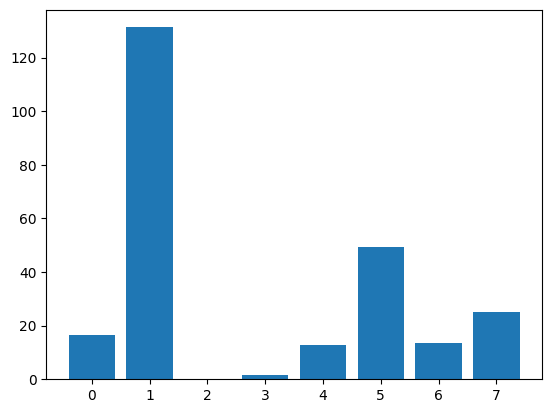

In [18]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Mutual Information Feature Selection

The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and categorical
output variables via the mutual info classif() function. Like f classif(), it can be used in the SelectKBest feature selection strategy (and other strategies).

In [20]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):

  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)

  # retrieve numpy array
  dataset = data.values

  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('indians-diabetes.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [22]:
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 0.017634
Feature 1: 0.108730
Feature 2: 0.040765
Feature 3: 0.033422
Feature 4: 0.019518
Feature 5: 0.073562
Feature 6: 0.010259
Feature 7: 0.040738


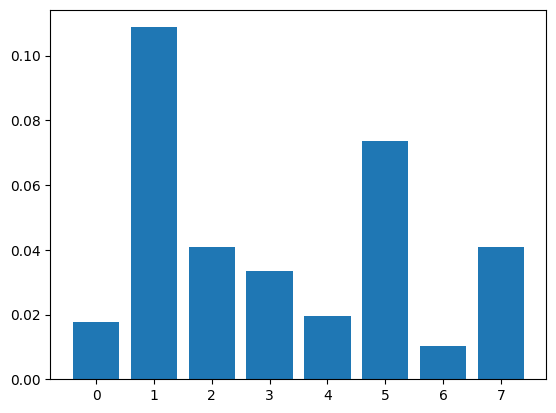

In [23]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()